![film](https://raw.githubusercontent.com/Mantvydas-data/Programming-for-DA-2021-Proj/main/data/denise-jans-tV80374iytg-unsplash.PNG)

Photo by <a href="https://unsplash.com/@dmjdenise?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Denise Jans</a> on <a href="https://unsplash.com/s/photos/film?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>


# Intro
***
The aim of this project is to simulate dataset that represents real life measurable phenomenon with simulated dataset having at least one hundred data points with at least four different variables. Sinthesised data should have close to real life properties and relationship amongst variables.

# Project description plan
***
During recent wordwide lockdown it became increasingly popular to have a subscription to one of many movie/TV streaming services. These platforms experienced unprecedented growth month on month basis becoming a daily habit for most. This project will look into simulating a dataset of fictional movie streaming platform 'MFLIX' usage log with dates, movie stream count per hour, movie category, user ID, user gender and user name. Various methods learned during this semester will be applied in this project to create a dataset with dependent variables.

# Generating data

Packages required for this project are loaded below, Numpy random package has a set seed for reproduceable random data for this project.

In [1]:
# Importing required packages by their orthodox abbreviations
import matplotlib.pyplot as plt # Plotting
import numpy as np # Mathematical arrays
import pandas as pd # Work with data frames
import re # Regular expressions.
import seaborn as sns # Plotting

# Importing Python modules String and Random
import string
import random

# Importing Numpy random generator and assigning it to rng variable
from numpy.random import default_rng

# Seed value 125 is set for reproduceable random data
rng = default_rng(seed=125)

# Dates and times by hour
MFLIX dataset requires a rannge of dates by hour for usage statistics simulation. A list od hourly timestamps will be generated to represent one month of usage that is December in 2021.

In [2]:
# Generating a range of dates by hour
# Count of hourly observations for month of December
periods = 31*24

# Hourly date and time for December
dfdate = pd.date_range('2021-12-01', freq='H', periods=periods)

dfdate

DatetimeIndex(['2021-12-01 00:00:00', '2021-12-01 01:00:00',
               '2021-12-01 02:00:00', '2021-12-01 03:00:00',
               '2021-12-01 04:00:00', '2021-12-01 05:00:00',
               '2021-12-01 06:00:00', '2021-12-01 07:00:00',
               '2021-12-01 08:00:00', '2021-12-01 09:00:00',
               ...
               '2021-12-31 14:00:00', '2021-12-31 15:00:00',
               '2021-12-31 16:00:00', '2021-12-31 17:00:00',
               '2021-12-31 18:00:00', '2021-12-31 19:00:00',
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00'],
              dtype='datetime64[ns]', length=744, freq='H')

# Streaming counts
***
To have realistic sreaming data views per hour needs to adhere to time of day to simulate peak and off-peak times of the day. Time serries data will be split by time of the day for random streaming data count to be generated having fewer streams during late night and early morning hours, medium usage during the day and peak time from 5 PM to 1AM. Streams will be 30% higher on Fridays, where on Saturday and Sunday they will increase to 40% compared to average work day usage.

In [3]:
# Creating H column to number each hour in the date range 
df= pd.DataFrame({'H': np.arange(len(dfdate))}, index=dfdate)

# Adding column H to df2 dataframe
df2 = df['H']

# Spliting time series by time of the day
night = pd.DataFrame(df.between_time("02:01","06:00"))
morning = pd.DataFrame(df.between_time("06:01","12:00"))
afternoon = pd.DataFrame(df.between_time("12:01","17:00"))
evening = pd.DataFrame(df.between_time("17:01","02:00"))

night

,H
2021-12-01 03:00:00,3
2021-12-01 04:00:00,4
2021-12-01 05:00:00,5
2021-12-01 06:00:00,6
2021-12-02 03:00:00,27
...,...
2021-12-30 06:00:00,702
2021-12-31 03:00:00,723
2021-12-31 04:00:00,724
2021-12-31 05:00:00,725


In [4]:
# Setting time of day clasification as a hard value fo each period
night['periods'] = 'night'
morning['periods'] = 'morning'
afternoon['periods'] = 'afternoon'
evening['periods'] = 'evening'

In [5]:
# Saving date-time as value instead of index
df['udates'] = df.index
# Populating weekdays for weekend usage to be incremented
df['weekday'] = df.index.weekday

In [6]:
# Setting df index to H for data to be joined based on it
df.set_index('H', inplace=True)
df

,udates,weekday
H,,
0,2021-12-01 00:00:00,2
1,2021-12-01 01:00:00,2
2,2021-12-01 02:00:00,2
3,2021-12-01 03:00:00,2
4,2021-12-01 04:00:00,2
...,...,...
739,2021-12-31 19:00:00,4
740,2021-12-31 20:00:00,4
741,2021-12-31 21:00:00,4


So far data consists of a date range by hour and weekday identified. Streaming usage data will be generated based on time of the day with 0 to 3 hourly streams during the night, 2 to 10 in the morning, 8 to 20 in the afternoon and peak of 20 to 35 streams per hour during evening periods.

In [7]:
# Generating random stream counts for different time of the day
# Night streams 0 to 3 per hour
night['streams'] = rng.integers(0, 4, len(night))
# Morning streams 2 to 10 per hour
morning['streams'] = rng.integers(2, 11, len(morning))
# Afternoon streams 8 to 20 per hour
afternoon['streams'] = rng.integers(8, 21, len(afternoon))
# Evening streams 20 to 35 per hour
evening['streams'] = rng.integers(20, 36, len(evening))

In [8]:
# Preview night stream data
night

,H,periods,streams
2021-12-01 03:00:00,3,night,1
2021-12-01 04:00:00,4,night,3
2021-12-01 05:00:00,5,night,0
2021-12-01 06:00:00,6,night,1
2021-12-02 03:00:00,27,night,1
...,...,...,...
2021-12-30 06:00:00,702,night,0
2021-12-31 03:00:00,723,night,3
2021-12-31 04:00:00,724,night,3
2021-12-31 05:00:00,725,night,1


Data needs to be joined together and for that we will need to specify a common index across all dataframes, H column will be used for it.

In [9]:
# Joining time periods
# Setting index to H for all
night.set_index('H', inplace=True)
morning.set_index('H', inplace=True)
afternoon.set_index('H', inplace=True)
evening.set_index('H', inplace=True)

In [10]:
# Appending all time of the day dataframes to night
night = night.append(morning)
night = night.append(afternoon)
night = night.append(evening)
night

,periods,streams
H,,
3,night,1
4,night,3
5,night,0
6,night,1
27,night,1
...,...,...
739,evening,21
740,evening,25
741,evening,23


In [11]:
# Joining values together on indexed H column
df = df.join(night, how='outer')

In [12]:
# Increasing weekend views to additional 30% on Fri and 40%- Sat, Sun
# Also, rounding derived values to int 
df['streams'] = np.rint(np.where(df['weekday'] == 4, df['streams'] * 1.3, df['streams']))
df['streams'] = np.rint(np.where((df['weekday'] == 5) | (df['weekday'] == 6), df['streams'] * 1.4, df['streams']))

In [13]:
df

,udates,weekday,periods,streams
H,,,,
0,2021-12-01 00:00:00,2,evening,24.0
1,2021-12-01 01:00:00,2,evening,24.0
2,2021-12-01 02:00:00,2,evening,28.0
3,2021-12-01 03:00:00,2,night,1.0
4,2021-12-01 04:00:00,2,night,3.0
...,...,...,...,...
739,2021-12-31 19:00:00,4,evening,27.0
740,2021-12-31 20:00:00,4,evening,32.0
741,2021-12-31 21:00:00,4,evening,30.0


In [14]:
# Saving count of date range hours to H column
df['H'] = df.index
df

,udates,weekday,periods,streams,H
H,,,,,
0,2021-12-01 00:00:00,2,evening,24.0,0
1,2021-12-01 01:00:00,2,evening,24.0,1
2,2021-12-01 02:00:00,2,evening,28.0,2
3,2021-12-01 03:00:00,2,night,1.0,3
4,2021-12-01 04:00:00,2,night,3.0,4
...,...,...,...,...,...
739,2021-12-31 19:00:00,4,evening,27.0,739
740,2021-12-31 20:00:00,4,evening,32.0,740
741,2021-12-31 21:00:00,4,evening,30.0,741


# User ID

User ID will be generated chosing two random letters followed by three random numbers, 50 active users from Ireland will have User IDs assigned. User data initially will be simulated as a separate dataframe and subsequently joined based on randomly assigned user count value N.

In [15]:
# Setting uid list for user IDs to be stored
uid=[]

# Setting random seed for Python Random method
random.seed(125)

# A for loop for radom 2 letter and random 3 digits to be generated as user IDs
for i in range(50):
    uid.append(''.join(random.choices(string.ascii_uppercase,k=2)) + ''.join(random.choices(string.digits,k=3)))

# Creating df2 dataframe with numbered 50 users
df2= pd.DataFrame({'N': np.arange(50)})

# Adding generated user IDs to df2
df2['uid'] = uid

df2.head(10)  

,N,uid
0,0,XF837
1,1,JP607
2,2,EN867
3,3,HM141
4,4,YH654
5,5,XQ711
6,6,BU504
7,7,NM693
8,8,QT845
9,9,TR752


# User gender

Gender will be populated for User IDs that afterwards will determine random user name selection.

In [16]:
# A list for genders
gender = ['female', 'male']

# Random selection of gender for 50 Irish users
df2['ugender'] = rng.choice(gender ,size=(len(df2)))
df2.head(10)

,N,uid,ugender
0,0,XF837,male
1,1,JP607,male
2,2,EN867,female
3,3,HM141,female
4,4,YH654,male
5,5,XQ711,male
6,6,BU504,female
7,7,NM693,male
8,8,QT845,female
9,9,TR752,male


In [17]:
# Checking gender distribution
df2['ugender'].value_counts()

male      27
female    23
Name: ugender, dtype: int64

50 user distribution generated is 27 males and 23 females.

# User Name
***
MFLIX platform user name will be selected from list of popular Irish names depending on gender variable assigned previously.
Names retrieved retrieved from [Irishcentral](https://www.irishcentral.com/roots/100-irish-language-first-names-meanings) website by copying page data to text file and using regular expressions to extract a list of 100 popular Irish names. Regular expressions are used for text processing operations, it will be used to identify the patern of numbered names in the file and save them as a list. 

To reproduce Names file in text format:
1. Open the website link
2. Press Control+p (opens printable version of the web page)
3. Select all be pressing Control+a followed by Control+c to copy information selected
4. Open new text document with editor of choice
5. Contol+v inside the file to paste copied data
6. Save txt file in project location under data folder as names.txt file

https://www.irishcentral.com/roots/100-irish-language-first-names-meanings

In [18]:
# Opening names.txt file for saved website data, reading its contents
with open('data/names.txt', 'r', encoding="utf8" ) as f2:
    data = f2.read()
    print(data[:2500])

12/30/21, 9:25 PM 100 Irish first names and their beautiful meanings
https://www.irishcentral.com/roots/100-irish-language-first-names-meanings 1/12
100 Irish first names and their beautiful meanings
Need to find an Irish name quick? Here are the top 100.
Kayla Hertz @IrishCentral May 02, 2021
Have a wee one on the way? Check out these Irish names. GETTY
Looking for an Irish name for a little bundle of joy on the way or justinspired by the beauty of
Irish names and their meanings? Here are 100 ideas for you!
Here are today's 100 most popular Irish language baby names, with their meanings and
pronunciations - 50 girl names and 50 boy names. See if yours made the cut, or peruse the list for
some inspiration!
Irish Girls Names:
1. Aoife (ee-fa)
This name means beautiful, radiant or joyful, and likely derives from the Gaelic word ‘aoibh’
meaning ‘beauty’ or ‘pleasure.’ In Irish mythology, Aoife is known as the greatest woman warrior in
the world. She gave birth to the mythological hero Cuc

***
Regular expression requires a string pattern to be specified for it to be used to find all fitting matches. Names file data has names numbered therefore it will be used for pattern matching. Regular expression will find all strings of one or more digits followed by a comma, a space and one or more letters that can be upper or lower case.

In [19]:
# Compile the regular expression for matching pattern.
re_names = re.compile(r'[0-9]+\.\s[A-Za-z]+')

In [20]:
# Compiled pattern is used to find all matches saving them as result list
result = re.findall(re_names, data)
result[:10]

['100.\nKayla',
 '1. Aoife',
 '2. Caoimhe',
 '3. Saoirse',
 '4. Ciara',
 '5. Niamh',
 '6. Roisin',
 '7. Cara',
 '8. Clodagh',
 '9. Aisling']

Looking at the website we should have 100 Irish names: 50 female and 50 male. Regular expression have matched 102 results- first and last will be not selected later as not relevant.

In [21]:
# Updating list to dataframe
namesdf = pd.DataFrame({'names':result})

# Replacing '\n' with ' '
namesdf.replace(regex=['\n'], value=' ', inplace= True)

Names need to be split from the numbers in the string, therefore a list is split as string on space between numbers and names.

In [22]:
# Splitting strings on space
tosplit =namesdf['names'].str.split(' ')
# Saving result as a list
split = tosplit.to_list()

# List is saved as two columns in a dataframe allowing for clean names under single column
splitnames= pd.DataFrame(split, columns= ['numbers','names'])

In [23]:
# Dropping numbers column as not required
splitnames= splitnames.drop(['numbers'], axis=1)

In [24]:
# Slicing names to female and male leaving out value 0 and 101
female= splitnames.iloc[1:50]
male= splitnames.iloc[51:100]
male.head()

,names
51,Conor
52,Sean
53,Oisin
54,Patrick
55,Cian


In [25]:
# Random selection of Irish names based on gender specified 
df2['uname'] = [rng.choice(female['names']) if x == 'female' else rng.choice(male['names']) for x in df2['ugender']]

df2.head(10)

,N,uid,ugender,uname
0,0,XF837,male,Collin
1,1,JP607,male,Barry
2,2,EN867,female,Kayleigh
3,3,HM141,female,Oonagh
4,4,YH654,male,Eoin
5,5,XQ711,male,Tadhg
6,6,BU504,female,Muireann
7,7,NM693,male,Liam
8,8,QT845,female,Emer
9,9,TR752,male,Niall


***
# Joining the data

Data will be joined together randomly assigning N- user counts number for each stream instance that will be used as index fro joining dataframes. Before it is done, data lines will be repeated by the number of streams generated for that hour, updating dataset to have a data line for each stream instance per specified hour.

In [26]:
# Expanding the dataframe to have value line for each stream in an hour
fulldf = pd.DataFrame(df.values.repeat(df.streams, axis=0), columns=df.columns)
fulldf

,udates,weekday,periods,streams,H
0,2021-12-01 00:00:00,2,evening,24.0,0
1,2021-12-01 00:00:00,2,evening,24.0,0
2,2021-12-01 00:00:00,2,evening,24.0,0
3,2021-12-01 00:00:00,2,evening,24.0,0
4,2021-12-01 00:00:00,2,evening,24.0,0
...,...,...,...,...,...
12768,2021-12-31 23:00:00,4,evening,27.0,743
12769,2021-12-31 23:00:00,4,evening,27.0,743
12770,2021-12-31 23:00:00,4,evening,27.0,743
12771,2021-12-31 23:00:00,4,evening,27.0,743


In [27]:
# Selecting N value for each observation that will be used as index to join data
fulldf['N']= rng.choice(df2['N'],size=(len(fulldf)))
fulldf

,udates,weekday,periods,streams,H,N
0,2021-12-01 00:00:00,2,evening,24.0,0,2
1,2021-12-01 00:00:00,2,evening,24.0,0,45
2,2021-12-01 00:00:00,2,evening,24.0,0,35
3,2021-12-01 00:00:00,2,evening,24.0,0,31
4,2021-12-01 00:00:00,2,evening,24.0,0,42
...,...,...,...,...,...,...
12768,2021-12-31 23:00:00,4,evening,27.0,743,4
12769,2021-12-31 23:00:00,4,evening,27.0,743,9
12770,2021-12-31 23:00:00,4,evening,27.0,743,36
12771,2021-12-31 23:00:00,4,evening,27.0,743,49


In [28]:
# Setting 'N' (numner of users) as index for both dataframes
df2.set_index('N', inplace=True)
fulldf.set_index('N', inplace=True)

In [29]:
# Joining df2 to fulldf
fulldf = fulldf.join(df2)

***
# Movie/TV-Series Category

Movie - TV Series category will be randomly assigned to views data from a list variable containing available categories on the MFLIX platform. Category classification has to be assigned post data is expanded and merged for each stream per hour to have real life setting where each user streams different category/movie.

In [30]:
# Setting available movie/TV series categories
categories = ['Action', 'Comedy', 'Drama', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Thriller', 'Western']
# Setting probability for each category
probability = [0.06, 0.14, 0.2, 0.18, 0.02, 0.12, 0.16, 0.02, 0.1]

fulldf['categories'] = rng.choice(categories,size=(len(fulldf)), p=probability)

# Saving Dataset

In [31]:
# Saving generated dataset as Excel file
fulldf.to_excel('data/finaldata.xlsx')

In [32]:
fulldf

,udates,weekday,periods,streams,H,uid,ugender,uname,categories
N,,,,,,,,,
0,2021-12-01 00:00:00,2,evening,24.0,0,XF837,male,Collin,Mystery
0,2021-12-01 01:00:00,2,evening,24.0,1,XF837,male,Collin,Western
0,2021-12-01 02:00:00,2,evening,28.0,2,XF837,male,Collin,Fantasy
0,2021-12-01 13:00:00,2,afternoon,20.0,13,XF837,male,Collin,Romance
0,2021-12-01 16:00:00,2,afternoon,14.0,16,XF837,male,Collin,Romance
...,...,...,...,...,...,...,...,...,...
49,2021-12-31 17:00:00,4,afternoon,13.0,737,TV914,male,Barry,Western
49,2021-12-31 21:00:00,4,evening,30.0,741,TV914,male,Barry,Comedy
49,2021-12-31 21:00:00,4,evening,30.0,741,TV914,male,Barry,Fantasy


# Dataset overview and analysis

Due to dataset having a line for each observation and mostly categorical values a form of count plot will be used to visualise data. As there is no limit of streams per account in instances where more than one stream per hour takes place will lead to generalisation that user account is shared by a number of people. Below analysis of generated data will look at MFLIX usage statistics for December 2021 with visualisations highlighting key points.

In [33]:
# Dimensions of dataset
print("Dimensions of MFLIX dataset is: rows {} columns." .format(fulldf.shape))

Dimensions of MFLIX dataset is: rows (12773, 9) columns.


MFLIX dataset has 12773 rows across 9 variable columns.

In [34]:
# Dataset information for values and data types generated.
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12773 entries, 0 to 49
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   udates      12773 non-null  datetime64[ns]
 1   weekday     12773 non-null  object        
 2   periods     12773 non-null  object        
 3   streams     12773 non-null  object        
 4   H           12773 non-null  object        
 5   uid         12773 non-null  object        
 6   ugender     12773 non-null  object        
 7   uname       12773 non-null  object        
 8   categories  12773 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 997.9+ KB


Data is indexed by user count number for 50 Irish users, only udates column is has datetime64 data type where the rest of 8 columns have object data type. Memory used is around 997.9 KB.

In [35]:
# Descriptive statistics including all columns and taking date time values as numeric
fulldf.describe(include='all', datetime_is_numeric=True)

,udates,weekday,periods,streams,H,uid,ugender,uname,categories
count,12773,12773.0,12773,12773.0,12773.0,12773,12773,12773,12773
unique,NaN,7.0,4,47.0,716.0,50,2,36,9
top,NaN,4.0,evening,34.0,259.0,PN645,male,Niall,Drama
freq,NaN,2378.0,8708,850.0,49.0,288,6956,1012,2570
mean,2021-12-16 12:38:47.753855744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2021-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2021-12-08 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2021-12-16 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2021-12-24 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2021-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see there are no missing values as every column has 12773 value count. Top user is male named Niall with user ID GN644. Most watched category in December was Drama.

In [36]:
# Total streams by gender
fulldf['ugender'].value_counts()

male      6956
female    5817
Name: ugender, dtype: int64

There were 6956 streams by male users and 5817 by female users. Difference can be explained by comparing MFLIX platform user count by gender where there are 4 males more compared to females.

In [37]:
# Total streams by category
fulldf['categories'].value_counts()

Drama       2570
Fantasy     2317
Romance     2043
Comedy      1733
Mystery     1539
Western     1283
Action       790
Thriller     250
Horror       248
Name: categories, dtype: int64

Looking at total streams by category Drama comes out as most popular with Fantasy and Romance froming top 3 viewed categories.

In [38]:
# Slicing one weeks data from 19/12/2021 to 26/12/2021
week3 = fulldf[(fulldf['udates'] > '2021-12-20') & (fulldf['udates'] <= '2021-12-27')]

In [39]:
# Week 3 streams by category
week3['categories'].value_counts()

Drama       584
Fantasy     520
Romance     482
Comedy      394
Mystery     368
Western     305
Action      173
Horror       65
Thriller     54
Name: categories, dtype: int64

Looking at third week of December data top watched categories are slightly different with Horror overtaking Thriller by views.

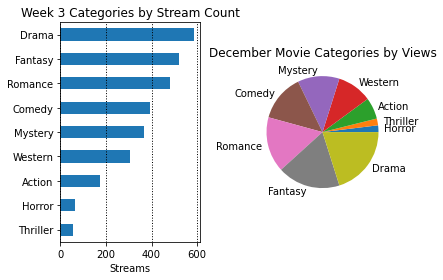

In [40]:
# Third week of December categories by popularity bar plot
plt.subplot(1,2,1) # Side by side subplots
week3.categories.value_counts().sort_values().plot(kind = 'barh')

plt.grid(axis='x', c='black', ls=':', lw='1')
plt.title('Week 3 Categories by Stream Count')
plt.xlabel("Streams")

# All December categories by popularity pie plot
plt.subplot(1,2,2) # Side by side subplots
fulldf.categories.value_counts().sort_values().plot(kind = 'pie')

plt.title('December Movie Categories by Views')
plt.ylabel("")

plt.tight_layout()
plt.show()

In [41]:
# Total streams by time of the day
fulldf['periods'].value_counts()

evening      8708
afternoon    2517
morning      1326
night         222
Name: periods, dtype: int64

As intended peak platform usage is seen during evening hours followed by afternoon views.

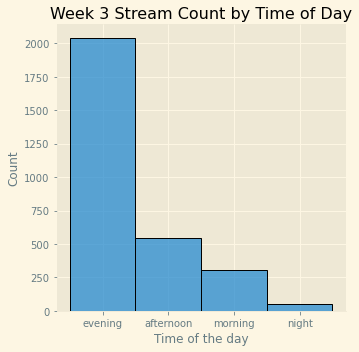

In [42]:
# Distribution plot for third week of December usage by time of day

# Setting plot style to Solarize_Light2
plt.style.use('Solarize_Light2')

# Setting plot parameters
sns.displot(week3, x='periods')
plt.title('Week 3 Stream Count by Time of Day')
plt.xlabel("Time of the day")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

Same time of the day usage distribution is observed on week 3 as in full month of December.

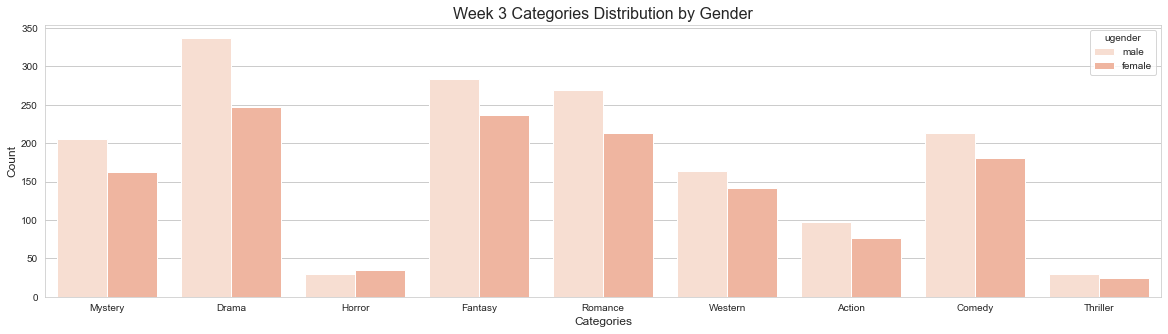

In [43]:
# Week 3 Movie Categories Distribution by Gender Plot

# Seaborn plot style- whitegrid with red palette
sns.set_style("whitegrid")
sns.set_palette("Reds")
plt.figure(figsize=(20,5))

# Setting plot parameters
sns.countplot(x="categories", hue="ugender", data=week3)
plt.title('Week 3 Categories Distribution by Gender')
plt.xlabel("Categories")
plt.ylabel("Count")

plt.show()

Loking at third week of December categories watched by gender male users have more views across all categories except Horror where there were more views by female users.

In [44]:
# Total streams by day of the week
fulldf['weekday'].value_counts()

4    2378
5    2000
6    1961
2    1803
3    1789
0    1428
1    1414
Name: weekday, dtype: int64

Highest daily usage during the month is observed on Friday followed by Saturday and Sunday. This is unexpected as Saturday and Sunday should ahve 10% more views compared to Friday, yet after confirming to calendar it evident values of 5 Fridays in December are taken where it is 4 Saturdays and Sundays. It highlights importance of reviewing and challenging data to close out any possible divergence.

[Text(0, 0, 'Mon'),
 Text(1, 0, 'Tue'),
 Text(2, 0, 'Wed'),
 Text(3, 0, 'Thu'),
 Text(4, 0, 'Fri'),
 Text(5, 0, 'Sat'),
 Text(6, 0, 'Sun')]

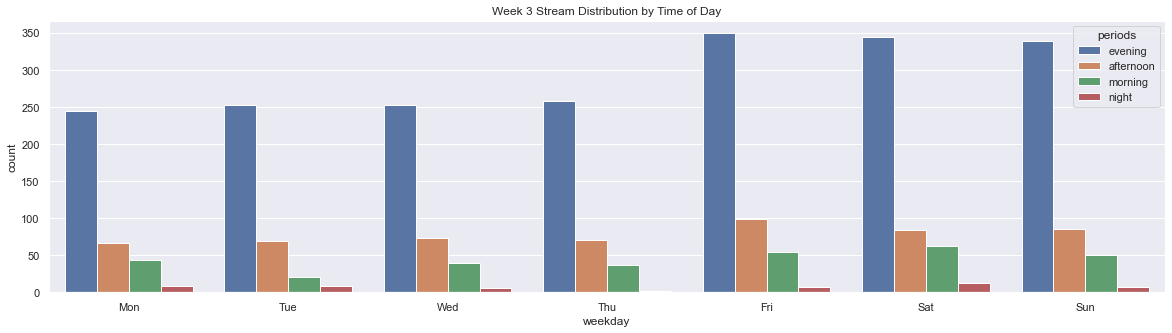

In [45]:
# Week 3 Stream Distribution by Time of Day Plot

# Seaborn plot style- darkgrid
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,5))
labels= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Setting plot parameters
ax = sns.countplot(x="weekday", hue="periods", data=week3)
plt.title('Week 3 Stream Distribution by Time of Day')
ax.set_xticklabels(labels)

December week 3 usage statistics are consistent across each day of the week looking at streaming distribution by time of day.

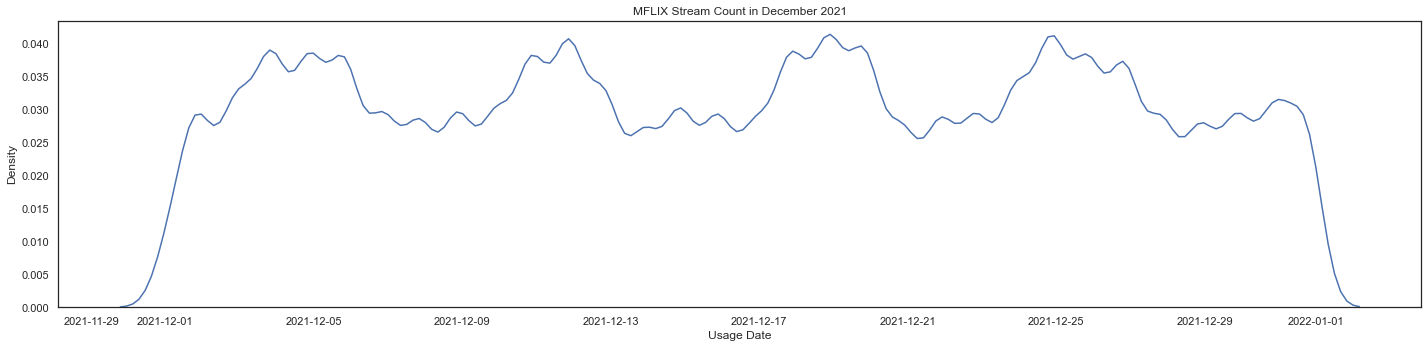

In [46]:
# MFLIX Stream Count Density Plot

# Seaborn plot style- white
sns.set_theme(style="white")
plt.figure(figsize=(20,5))

# Setting plot parameters
sns.kdeplot(fulldf['udates'], bw_adjust= 0.3)
plt.title('MFLIX Stream Count in December 2021')
plt.xlabel("Usage Date")

plt.tight_layout()
plt.show()

Plot clearly indicates higher platform usage during Fridays and weekends, there were 4 weekends in December 2021 with last week finishing on Friday with plot showing higher value density for it.

# Bibliography

https://stackoverflow.com/questions/41598916/resize-the-image-in-jupyter-notebook-using-markdown

https://stackoverflow.com/questions/41598916/resize-the-image-in-jupyter-notebook-using-markdown

https://stackoverflow.com/questions/56310849/generate-random-timeseries-data-with-dates

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

https://numpy.org/doc/stable/reference/generated/numpy.rint.html


https://stackoverflow.com/questions/28009370/get-weekday-day-of-week-for-datetime-column-of-dataframe

https://pandas.pydata.org/pandas-docs/version/0.17.1/merging.html

https://www.stackvidhya.com/pandas-iterate-over-rows/

https://datagy.io/pandas-conditional-column/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.itertuples.html

https://www.geeksforgeeks.org/how-to-generate-a-random-letter-in-python/

https://stackoverflow.com/questions/2823316/generate-a-random-letter-in-python

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

https://www.tutorialspoint.com/python/string_decode.html

https://docs.python.org/3/library/re.html#re.search

https://careerkarma.com/blog/python-valueerror-io-operation-on-closed-file/

https://www.programiz.com/python-programming/file-operation

https://www.kite.com/python/answers/how-to-split-a-pandas-dataframe-column-in-python

# END.